In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('spam.csv',encoding="ISO-8859-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1 )

In [4]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data = data.rename(columns={'v1':'target','v2':'email_text'})

In [6]:
data

,target,email_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   email_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['target'] = label.fit_transform(data['target'])

In [9]:
data

,target,email_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
data.isnull().sum()

target        0
email_text    0
dtype: int64

In [11]:
data.duplicated().sum()

403

In [12]:
data = data.drop_duplicates(keep='first')

In [13]:
data

,target,email_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
data.value_counts(['target'])

target
0         4516
1          653
dtype: int64

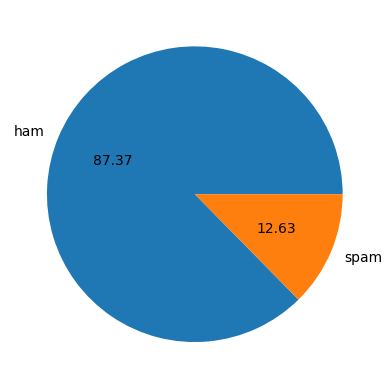

In [15]:
import matplotlib.pyplot as plt
plt.pie(data.value_counts(['target']) , labels=['ham','spam'] , autopct = '%.2f')
plt.show()

In [16]:
import nltk

In [17]:
data['number_of_characters']=data['email_text'].apply(len)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5920\4014999587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number_of_characters']=data['email_text'].apply(len)


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
data

,target,email_text,number_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
data['number_of_words'] = data['email_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
data['number_of_sentences'] = data['email_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
data

,target,email_text,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [23]:
data.describe()

,target,number_of_characters,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [24]:
import seaborn as sns

<Axes: xlabel='number_of_characters', ylabel='Count'>

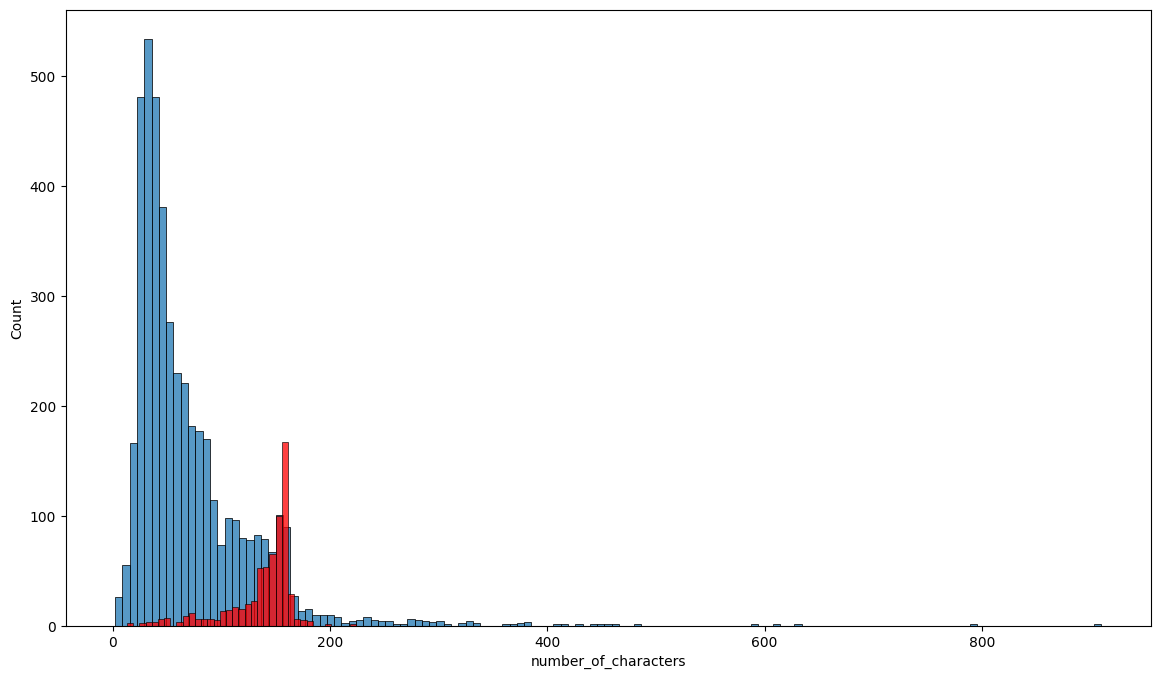

In [25]:
plt.figure(figsize=(14,8))
sns.histplot(data[data['target'] == 0]['number_of_characters'])
sns.histplot(data[data['target'] == 1]['number_of_characters'],color='red')

<Axes: xlabel='number_of_words', ylabel='Count'>

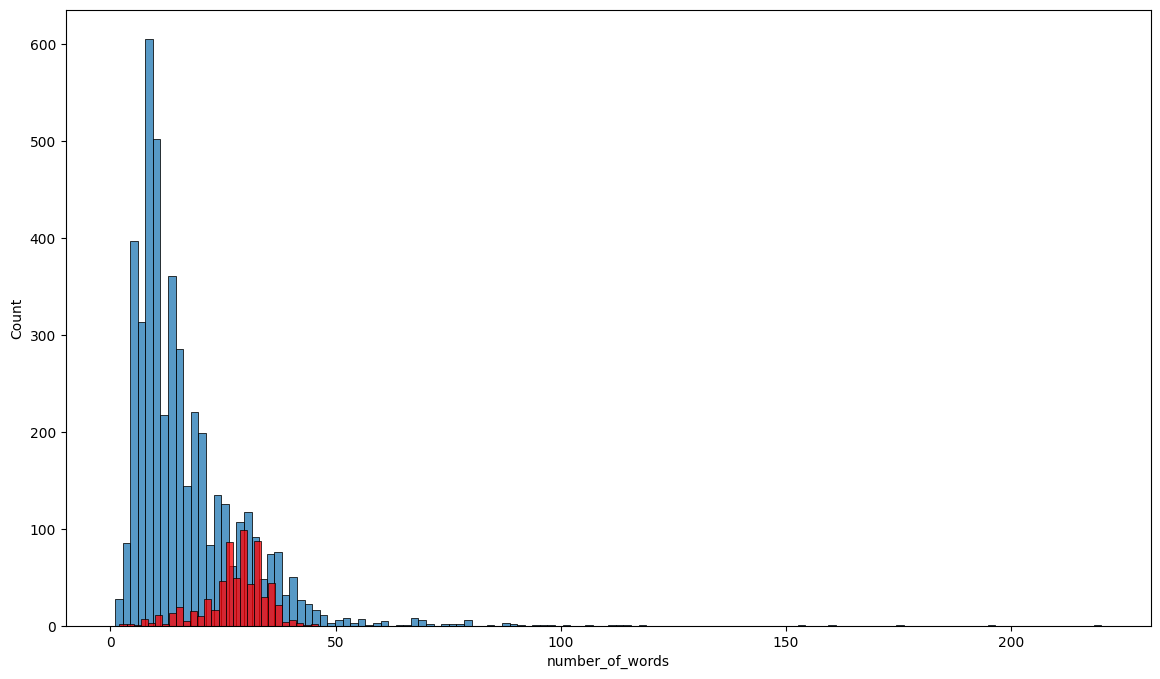

In [26]:
plt.figure(figsize=(14,8))
sns.histplot(data[data['target'] == 0]['number_of_words'])
sns.histplot(data[data['target'] == 1]['number_of_words'],color='red')

<Axes: xlabel='number_of_sentences', ylabel='Count'>

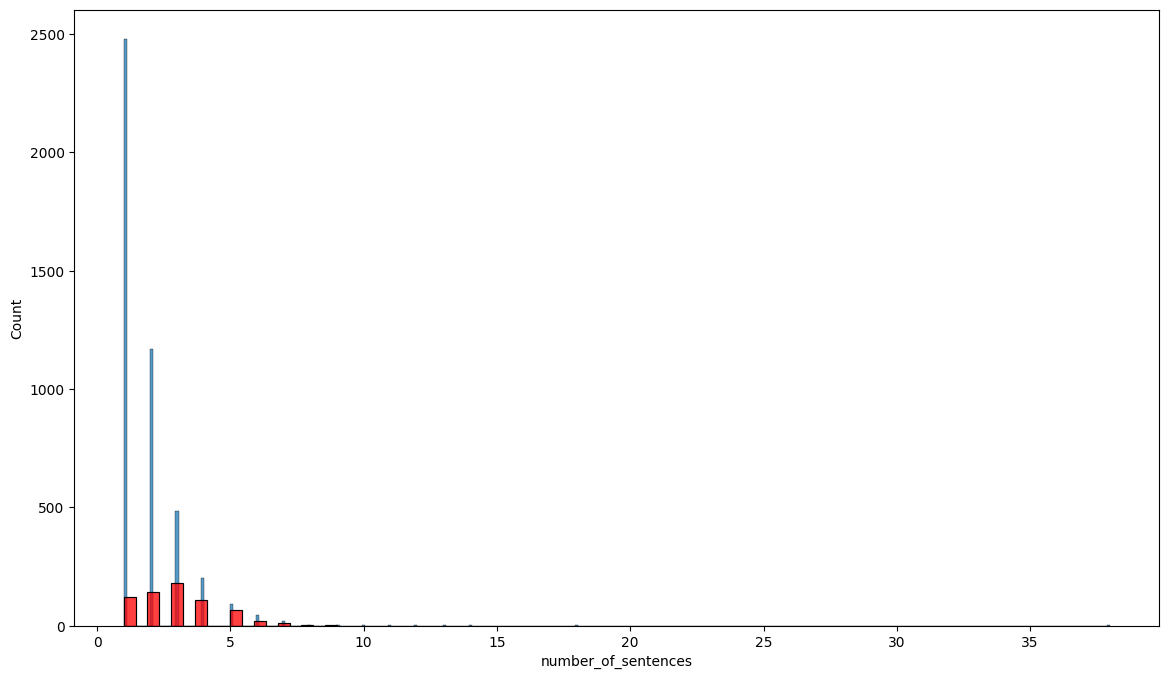

In [27]:
plt.figure(figsize=(14,8))
sns.histplot(data[data['target'] == 0]['number_of_sentences'])
sns.histplot(data[data['target'] == 1]['number_of_sentences'],color='red')

In [28]:
data.corr()

,target,number_of_characters,number_of_words,number_of_sentences
target,1.000000,0.384717,0.262912,0.263939
number_of_characters,0.384717,1.000000,0.965760,0.624139
number_of_words,0.262912,0.965760,1.000000,0.679971
number_of_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

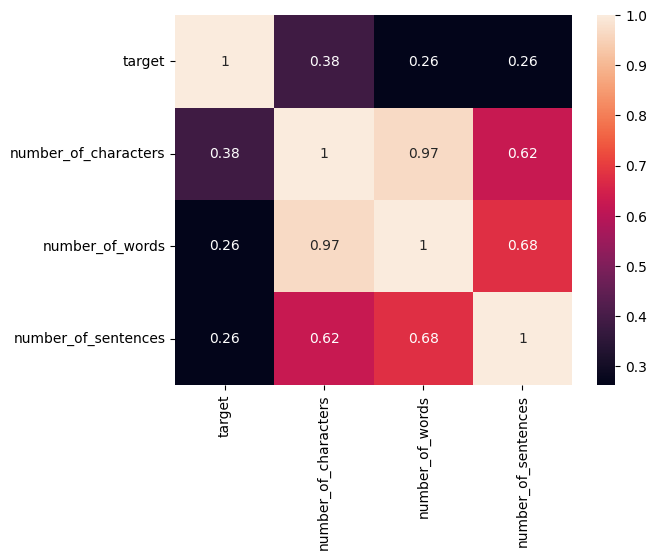

In [29]:
sns.heatmap(data.corr(),annot = True)

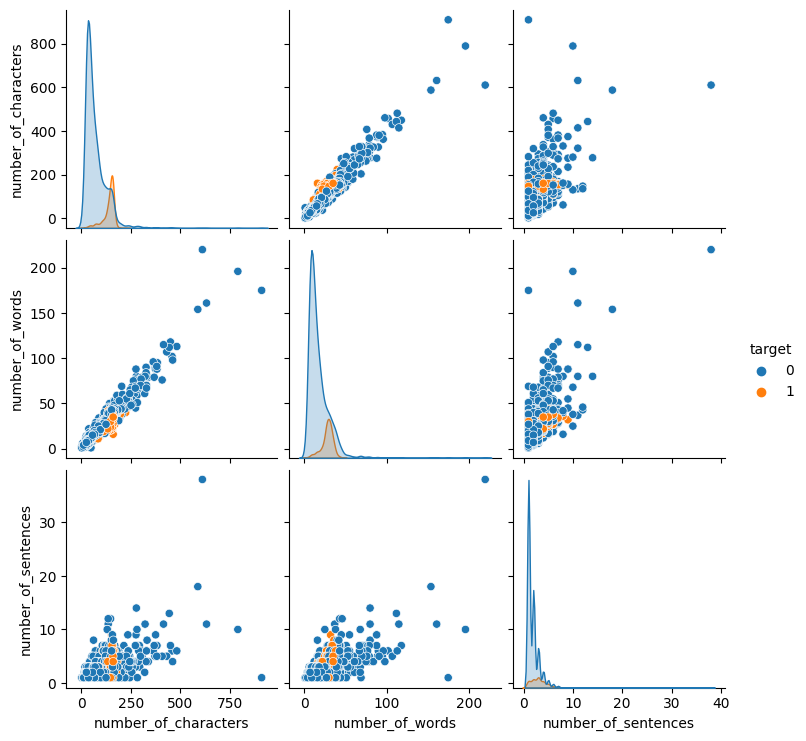

In [30]:
sns.pairplot(data,hue ='target')

In [31]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
data['transformed_text']=data['email_text'].apply(transform_text)

In [36]:
data

,target,email_text,number_of_characters,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [37]:
import wordcloud

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=5000,height=5000,min_font_size=10,background_color = 'white')
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=' '))

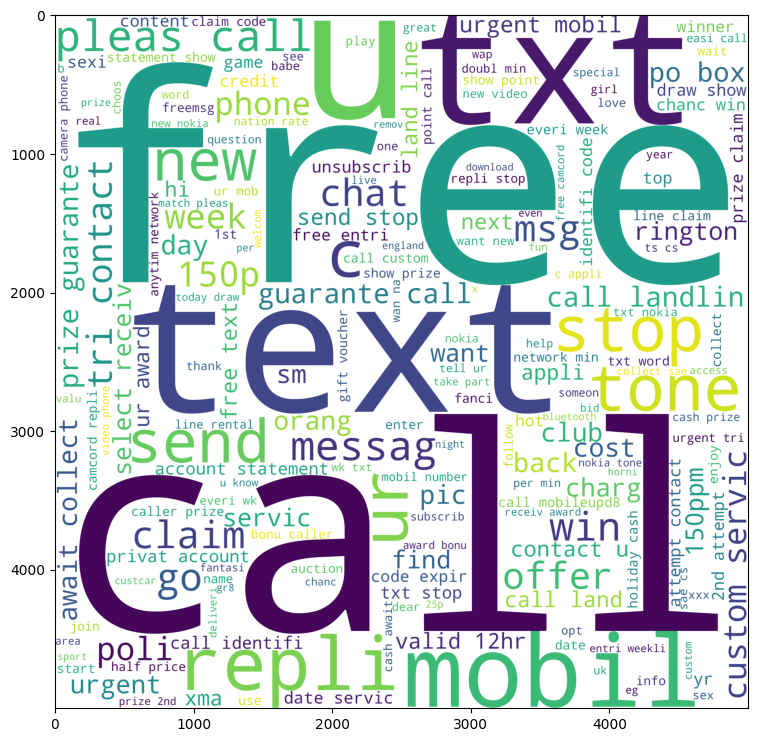

In [39]:
plt.figure(figsize = (14,9))
plt.imshow(spam_wc)

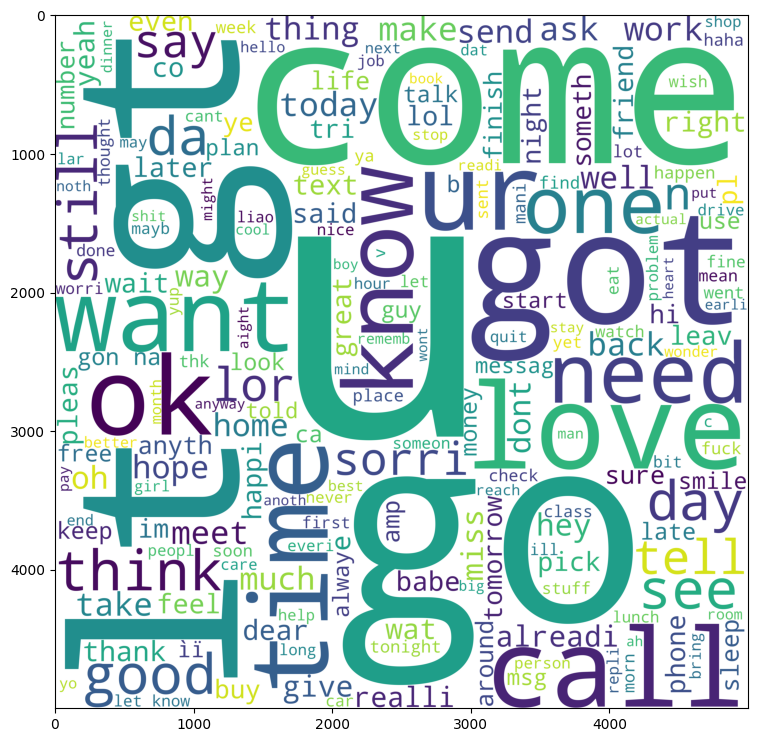

In [40]:
non_spam_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize = (14,9))
plt.imshow(non_spam_wc)

In [41]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

In [43]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [44]:
not_spam_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)


In [45]:
len(not_spam_corpus)

35404

In [46]:
pd.DataFrame(Counter(not_spam_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(data['transformed_text'])

In [48]:
y = data['target'].values

In [49]:
x.shape

(5169, 3000)

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=5)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score

In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [54]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [55]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [56]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9811320754716981
For  KN
Accuracy -  0.913926499032882
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  0.9901960784313726
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8426966292134831
For  LR
Accuracy -  0.9593810444874274
Precision -  0.978021978021978
For  RF
Accuracy -  0.9758220502901354
Precision -  1.0
For  AdaBoost
Accuracy -  0.9758220502901354
Precision -  1.0
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8512396694214877
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9727272727272728
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9310344827586207
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9298245614035088


In [57]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [69]:
model = Sequential()
model.add(Dense(256,activation='relu',input_dim=3000))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               768256    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [71]:
model.compile(optimizer = 'adam' , loss ='binary_crossentropy',metrics=['accuracy'])

In [72]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [73]:
history = model.fit(x_train,y_train , batch_size=100, epochs=100,validation_data=(x_test,y_test),callbacks = [callback])

Epoch 1/100
42/42 [==============================] - 2s 17ms/step - loss: 0.4585 - accuracy: 0.8353 - val_loss: 0.2320 - val_accuracy: 0.8752
Epoch 2/100
42/42 [==============================] - 1s 12ms/step - loss: 0.1693 - accuracy: 0.8733 - val_loss: 0.1680 - val_accuracy: 0.8752
Epoch 3/100
42/42 [==============================] - 1s 13ms/step - loss: 0.1096 - accuracy: 0.8733 - val_loss: 0.1907 - val_accuracy: 0.8752
Epoch 4/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0946 - accuracy: 0.9894 - val_loss: 0.2374 - val_accuracy: 0.9700
Epoch 5/100
42/42 [==============================] - 1s 12ms/step - loss: 0.0906 - accuracy: 0.9973 - val_loss: 0.2686 - val_accuracy: 0.9691
Epoch 6/100
42/42 [==============================] - 1s 12ms/step - loss: 0.0874 - accuracy: 0.9973 - val_loss: 0.2797 - val_accuracy: 0.9720
Epoch 7/100
42/42 [==============================] - 1s 12ms/step - loss: 0.0852 - accuracy: 0.9983 - val_loss: 0.2904 - val_accuracy: 0.9720
Epoch 

In [74]:
history.history

{'loss': [0.45853865146636963,
  0.16930444538593292,
  0.10956452041864395,
  0.09464091807603836,
  0.09057778120040894,
  0.08736421167850494,
  0.0851999893784523,
  0.08382393419742584,
  0.08274278044700623,
  0.08067042380571365,
  0.07894371449947357,
  0.07716589421033859,
  0.07553990185260773,
  0.07396204024553299,
  0.07241441309452057,
  0.0716744139790535,
  0.06964310258626938,
  0.06739803403615952,
  0.06857522577047348,
  0.0656934306025505,
  0.0636916384100914,
  0.06250308454036713,
  0.061266105622053146,
  0.06016816198825836,
  0.058251649141311646,
  0.056435082107782364,
  0.0560765415430069,
  0.04813084006309509,
  0.014039150439202785,
  0.00374159449711442,
  0.003479145234450698,
  0.003275002120062709,
  0.003752147313207388,
  0.0032450626604259014,
  0.003728985320776701,
  0.0028282662387937307,
  0.0024100476875901222,
  0.002728166524320841,
  0.002614883938804269,
  0.0029625226743519306],
 'accuracy': [0.8353083729743958,
  0.8732768893241882,
  

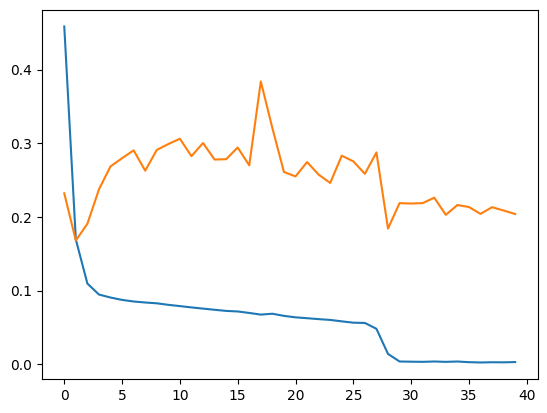

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

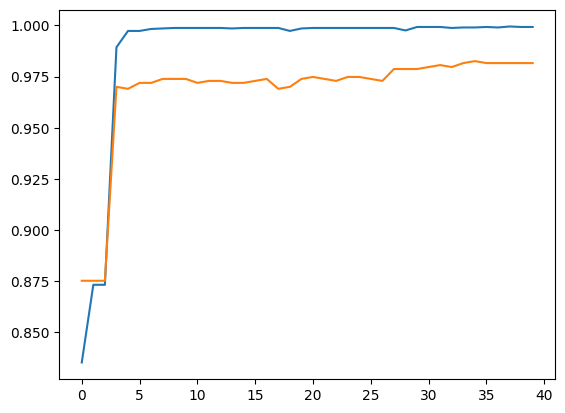

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [84]:
a = "50 percent off on sale"
b = transform_text(a)
c = tfidf.transform([b])
model.predict(c)[0]

InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,141] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [92]:

import pickle
with open('finalmodel','wb') as f:
    pickle.dump(etc,f)


In [68]:
with open('vector','wb') as f:
    pickle.dump(tfidf,f)